# 1. 토큰화(Tokenization) :주어진 텍스트를 단어 또는 문자 단위로 자르는 것


## 1. spaCy 사용하기

In [90]:
# !pip install -U spacy
# !python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [91]:
en_text = "A Dog Run back corner near spare bedrooms"
import spacy
spacy_en = spacy.load('en_core_web_sm')
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

print(tokenize(en_text))



['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


## 2. NLTK 사용하기

In [92]:
# !pip install nltk

In [93]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sswwd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3. 띄어쓰기로 토큰화

In [94]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


한국어는 조사, 접사 등으로 인해 단순 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식되어서 단어 집합(vocabulary)의 크기가 불필요하게 커지기 때문에 토큰화 작업이 까다롭다.

* 단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미합니다.

예를 들어 단어 '사과'가 많이 들어간 어떤 문장에 띄어쓰기 토큰화를 한다면 '사과가', '사과를', '사과의', '사과와', '사과는'과 같은 식으로 같은 단어임에도 조사가 붙어서 다른 단어로 인식될 수 있습니다. 

## 4. 한국어 띄어쓰기 토큰화

In [95]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


'사과'란 단어가 총 4번 등장했는데 모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식

## 5. 형태소 토큰화
한국어 특성에 맞게 형태소 분석기로 토근화를 한다.

https://uwgdqo.tistory.com/363 
그대로 따라해서 macab 설치

In [96]:
# !pip install konlpy

In [97]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

print(mecab.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


단어 단위가 아닌 더 작은 문자 단위로도 토큰화 할 수 있다.


In [98]:
print(list(en_text))
print(list(kor_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']
['사', '과', '의', ' ', '놀', '라', '운', ' ', '효', '능', '이', '라', '는', ' ', '글', '을', ' ', '봤', '어', '.', ' ', '그', '래', '서', ' ', '오', '늘', ' ', '사', '과', '를', ' ', '먹', '으', '려', '고', ' ', '했', '는', '데', ' ', '사', '과', '가', ' ', '썩', '어', '서', ' ', '슈', '퍼', '에', ' ', '가', '서', ' ', '사', '과', '랑', ' ', '오', '렌', '지', ' ', '사', '왔', '어']


## 2. 단어 집합(Vocabulary) 생성

단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미

In [232]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [233]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:100]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
95,3908729,진짜 최고다 최고 성룡형님 마이 우상,1
96,6318878,amy6250 당신이 좋아하는 장르는 뭐요? 이영화에도 저영화에도 이런장르는 싫다니원,1
97,2620222,지금까지 본영화중에 최고다,1
98,5954450,매회리타가자꾸거슬려서죽었으면좋겠다고생각했는데ㅠㅠ죄책감에나도잠못이룬다.,1


In [234]:
print('전체 샘플의 수 : {}'.format(len(data)))

전체 샘플의 수 : 200000


In [235]:
sample_data = data[2000:2500] # 임의로 100개만 저장
sample_data

,id,document,label
2000,9832225,"끝내주고 짜임새 있는 액션과 카메라 워킹, 시리즈 중 최고였다.",1
2001,9434805,지금까지 12번은 넘게 본 영화입니다.우울할때 이영화를 찾게되고 기분전환이 되어 가...,1
2002,139278,광활한 아프리카에서 소녀의 성장기 감동 팍팍,1
2003,9483513,채널돌리다가 멈춘영화...스토리를 알고보는것보다 모르고보는것이 좋을듯 ... 스토리...,1
2004,8657623,Js(kjs7****)//아니 잠깐 판타스틱4 에서 맡았던 역할은 어떻게 설명할건데??,1
...,...,...,...
2495,168912,미키 신이치로 멋짐!,1
2496,1210015,치밀한 현실성.. 결과적 냉소는 더 포경선을 만선한듯 하다.,1
2497,10182346,행복과 삶에 대해 진지하게 생각해볼 수 있게 했던 영화 ~!,1
2498,353866,그래도 ㅋㅋㅋ,1


In [236]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
sample_data


C:\Users\sswwd\AppData\Local\Temp/ipykernel_18308/3811235600.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\sswwd\AppData\Local\Temp/ipykernel_18308/3811235600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
2000,9832225,끝내주고 짜임새 있는 액션과 카메라 워킹 시리즈 중 최고였다,1
2001,9434805,지금까지 번은 넘게 본 영화입니다우울할때 이영화를 찾게되고 기분전환이 되어 가끔 찾...,1
2002,139278,광활한 아프리카에서 소녀의 성장기 감동 팍팍,1
2003,9483513,채널돌리다가 멈춘영화스토리를 알고보는것보다 모르고보는것이 좋을듯 스토리와 연기에 ...,1
2004,8657623,아니 잠깐 판타스틱 에서 맡았던 역할은 어떻게 설명할건데,1
...,...,...,...
2495,168912,미키 신이치로 멋짐,1
2496,1210015,치밀한 현실성 결과적 냉소는 더 포경선을 만선한듯 하다,1
2497,10182346,행복과 삶에 대해 진지하게 생각해볼 수 있게 했던 영화,1
2498,353866,그래도 ㅋㅋㅋ,1


In [237]:
# ㅋ로 시작하는 문자열만 뽑기
# sample_data['document'] = sample_data['document'].str.replace("[^ㅋ]","")

# ㅋㅋㅋ 이런 것들 다 빠짐
# sample_data2['document'] = sample_data['document'].str.replace("[^가-힣 ]","")

# 띄어쓰기 없이 뽑고싶다면 끝이나 앞에 공백없이 입력
# sample_data['document'] = sample_data['document'].str.replace("[^가-힣]","")

# ^가 없으면 []안의 조건으로 출력
# sample_data['document'] = sample_data['document'].str.replace("[가-힣 ]","냐")

# ^가 있으면 []안의 조건이 아닌 것을 출력
# sample_data['document'] = sample_data['document'].str.replace("[^가-힣 ]","냐")


# sample_data

# sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
# "" 표시 안하면 에러난다. replace이기 때문. -> "원하는 값", "바꿀 값"

불용어를 제거하기 위해 불용어를 우선 정의한다

In [238]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [239]:
tokenizer = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

tokenized=[]
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)
print(tokenized[:10])

[['끝내', '주', '고', '짜임', '새', '있', '액션', '카메라', '워킹', '시리즈', '중', '최고', '였', '다'], ['지금', '까지', '번은', '넘', '게', '본', '영화', '입니다', '우울', '할', '때', '영화', '찾', '게', '되', '고', '기분', '전환', '되', '어', '가끔', '찾', '아', '봅니다'], ['광활', '아프리카', '에서', '소녀', '성장기', '감동', '팍팍'], ['채널', '돌리', '다가', '멈춘', '영화', '스토리', '알', '고', '보', '것', '보다', '모르', '고', '보', '것', '좋', '을', '듯', '스토리', '연기', '빠져', '든다'], ['아니', '잠깐', '판타스틱', '에서', '맡', '았', '던', '역할', '어떻게', '설명', '할', '건데'], ['정극', '만들', '었', '다면', '어땠을까', '너무', '좋', '스토리', '인데', '연출', '때문', '향기', '얕', '다', '그래도', '점', '영화', '너무', '좋', '음'], ['진짜', '재밌', '다', 'ㅠㅜ', '로다', '주', '사랑', '합니다'], ['재', '밌다귀엽다애기ㅠㅠ하'], ['완전', '감동', '도가니', '탕', '재밌', '었', '고', '슬펐', '다', '최고'], ['정말', '재밌', '드라마', '였', '습니다']]


In [295]:
# NLTK에서는 빈도수 계산 도구인 FreqDist()를 지원
vocab = FreqDist(np.hstack(tokenized)) # 가로로 결합
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 1997


단어를 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어져 있습니다. vocab에 단어를 입력하면 빈도수를 리턴합니다.

In [297]:
# vocab['재밌']
vocab


FreqDist({'다': 183, '영화': 177, '하': 147, '고': 143, '을': 115, '보': 101, '게': 93, '있': 67, '좋': 60, '지': 60, ...})

In [298]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))
# print(type(vocab))

단어 집합의 크기 : 500


In [299]:
vocab

[('다', 183),
 ('영화', 177),
 ('하', 147),
 ('고', 143),
 ('을', 115),
 ('보', 101),
 ('게', 93),
 ('있', 67),
 ('좋', 60),
 ('지', 60),
 ('재밌', 53),
 ('정말', 52),
 ('었', 50),
 ('최고', 45),
 ('너무', 45),
 ('봤', 40),
 ('아', 39),
 ('진짜', 38),
 ('는데', 37),
 ('나', 36),
 ('것', 35),
 ('네요', 35),
 ('았', 34),
 ('없', 33),
 ('적', 33),
 ('지만', 33),
 ('습니다', 32),
 ('만', 32),
 ('어요', 32),
 ('안', 30),
 ('수', 29),
 ('했', 29),
 ('에서', 26),
 ('감동', 26),
 ('로', 26),
 ('같', 26),
 ('음', 25),
 ('않', 24),
 ('재미있', 24),
 ('어', 23),
 ('생각', 23),
 ('더', 22),
 ('말', 22),
 ('주', 21),
 ('되', 21),
 ('연기', 21),
 ('드라마', 21),
 ('내', 21),
 ('기', 21),
 ('인', 21),
 ('중', 20),
 ('듯', 20),
 ('ㅋㅋ', 20),
 ('요', 20),
 ('였', 18),
 ('본', 18),
 ('해', 18),
 ('면', 18),
 ('ㅋㅋㅋ', 18),
 ('던', 16),
 ('사람', 16),
 ('볼', 16),
 ('그', 16),
 ('입니다', 15),
 ('때', 15),
 ('사랑', 15),
 ('거', 15),
 ('싶', 15),
 ('다시', 15),
 ('년', 15),
 ('할', 14),
 ('스토리', 14),
 ('알', 14),
 ('남', 14),
 ('평점', 14),
 ('편', 14),
 ('잼', 14),
 ('이거', 14),
 ('까지', 13),
 ('만들', 13),


## 3. 각 단어에 고유한 정수 부여

enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴한다는 특징이 있다. 인덱스 0과 1은 다른 용도로 남겨두고 나머지 단어들은 2부터 501까지 순차적으로 인덱스를 부여해봅시다.

In [300]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [301]:
encoded = []
for line in tokenized: # 불용어를 뺀 입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      print(w)
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합(상위500개)에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

끝내
주
고
짜임
새
있
액션
카메라
워킹
시리즈
중
최고
였
다
지금
까지
번은
넘
게
본
영화
입니다
우울
할
때
영화
찾
게
되
고
기분
전환
되
어
가끔
찾
아
봅니다
광활
아프리카
에서
소녀
성장기
감동
팍팍
채널
돌리
다가
멈춘
영화
스토리
알
고
보
것
보다
모르
고
보
것
좋
을
듯
스토리
연기
빠져
든다
아니
잠깐
판타스틱
에서
맡
았
던
역할
어떻게
설명
할
건데
정극
만들
었
다면
어땠을까
너무
좋
스토리
인데
연출
때문
향기
얕
다
그래도
점
영화
너무
좋
음
진짜
재밌
다
ㅠㅜ
로다
주
사랑
합니다
재
밌다귀엽다애기ㅠㅠ하
완전
감동
도가니
탕
재밌
었
고
슬펐
다
최고
정말
재밌
드라마
였
습니다
어떻게
평론
저따위
로
쓸
수
있
지
적어도
단점
장점
써야
할
거
아냐
진짜
공효진
보
려고
본
영환데
내용
너무
좋
았
고
연출
음악
맘
고
신민아
이렇게
연기
하
줄
몰랐
다
맨날
소고기
타령
해서
그런
것
만
하
줄
알
았
는데
ㅋㅋ
내
간절히
바라
것
신념
라면
그건
강요
의해서
버려
지
게
아니
지
까미유
끌로델
검
고
푸른
눈
그녀
열정
담긴
보
고
싶
한국
영화
토
렌토
우리
구세주
끝내
주
싸이코
연기
대부분
가볍
게
킬링
타임
용
보
기
좋
다는
평이
라
의외
네요
단순히
킬링
타임
용
아닌
거
같
고
주인공
환경
던지
메시지
있
영화
인
거
같
습니다
정말
괜찮
영화
입니다
추천
재밌
당
오정세
진짜
웃기
고
매력
있
네요
재밌
다큐
였
어요
이건
중
때
봤
던
영화
인데
지금
다시
번
보
니
옛날
이나
지금
이나
최고
인
것
같
고
힘든
일상
에서
정말
호탕
하
게
웃
었
습니다
진작
봤
으면
더
좋
았
을
텐데
많
생각
을
하
게
해
주
네요
유쾌
최고
여운
남
영화
상영관
별로
없
다는
게
아쉽
다
데스노트
흡사
듯
하나
또
다른
발상
정말
신선
소재
영화
였
다
다만
아쉬운
건
소재
제작비
넉넉
투자
가능
곳
에서
제작
했
다면
정말
명작
하나
탄생
했을지도
그렇
다고
해서
상태
안
좋
다는
건
또
아니
다
다만
아쉬

In [302]:
print(tokenized[6])
print(encoded[6])
# 'ㅠㅠ','로다'는 상위 500개 단어집합에 없어서 0으로 변환
# vocab['주'] 는 21개 있음

['진짜', '재밌', '다', 'ㅠㅜ', '로다', '주', '사랑', '합니다']
[19, 12, 2, 0, 0, 45, 67, 105]


## 4. 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

패딩 작업은 정해준 길이로 모든 샘플들의 길이를 맞춰주되, 길이가 정해준 길이보다 짧은 샘플들에는 'pad' 토큰을 추가하여 길이를 맞춰주는 작업

리뷰의 최대 길이 : 60
리뷰의 최소 길이 : 0
리뷰의 평균 길이 : 12.804000


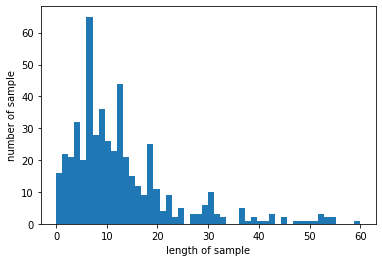

In [303]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [308]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [309]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 60
리뷰의 최소 길이 : 60
리뷰의 평균 길이 : 60.000000


In [310]:
print(encoded[:3])

[[186, 45, 5, 0, 0, 9, 92, 404, 0, 129, 52, 15, 56, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [93, 80, 0, 288, 8, 57, 3, 65, 405, 72, 66, 3, 187, 8, 46, 5, 225, 0, 46, 41, 406, 187, 18, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 34, 0, 0, 35, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
